
# Project: Investigate TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project takes a look at the TMDb Dataset. The dataset set contains information for over 10 000 movies 1960 and 2015. Data in the dataset ranges from the cast, directors, budget, revenue, movie ratings, genres and more. This dataset opens up opportunities to analyse and understand the performance of movies over the last 56 years.
>
> This project aims to clean the dataset, conduct exploratory data analysis and make tentative conclusions based on the EDA.
>
> Questions that will be answered:
> 1. Which were the top 10 movies based on revenue & profit?
> 2. How has profit changed over the past 56 years?
> 3. Which were the bottom 10 movies which lost money?
> 3. Is there a relationship between vote_average and profit?
> 4. Is there a relationship between budget & profit?
> 5. Is there a relationship between runtime & profit?
> 6. Is there a relationsgip between revenue & profit?

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I shall load the data, check for cleanliness, and then trim and clean the dataset to be ready for analysis.

### General Properties

> First I am going to load and assess the dataset in its current state.

In [79]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


First Assessment is that there a few columns that we do not need in the dataset:
1. ID
2. imdb_id
3. Budget (we have adjusted budget which accounts for inflation and changes value to USD - better for comparitive analysis)
4. Revenue (we have adjusted revenue which accounts for inflation and changes value to USD - better for comparitive analysis)
5. Homepage
6. Tagline
7. Overview

We have budget & revenue which means we can calculate profit for each movie.

We also see that columns cast, genres, keywords & production_companies, have lists delimited by pipes (|).

In [80]:
df.shape

(10866, 21)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

First to note that there are a few fields missing values (will explore in next cell). Also that release_date is an object (string) datatype and that will be need to change to a time datatype

In [83]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There are quite a few fields with null values. Some do not matter, like homepage and tagline which will be dropped by the dataset. Will relook at this one we have dropped some of the unnessceary fields.

In [84]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


At least 50% of the movies have USD 0 budget and USD 0 revenue. For this analysis, we are going to turn the $0 budget and revenue into null values and exclude them from the dataset.

In [85]:
print(df.duplicated().sum())

1


The duplicate line can be removed from the dataset

In [86]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Cleaning the Dataset

First we are going to drop the unnessecary columns for this analysis.

In [87]:
#drop columns not being used (ID & IBMID, budget, revenue, homepage, tagline, overview)
df.drop(["id","imdb_id","budget","revenue","homepage","tagline","overview" ], axis = 1, inplace = True)

In [88]:
#assess if more duplicates
print(df.duplicated().sum())


1


Still one duplidate, so that will also be removed.

In [89]:
#drop duplicates
df.drop_duplicates(inplace = True)

In [90]:
#check duplicates are dropped
print(df.duplicated().sum())

0


In [91]:
#check table info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   original_title        10865 non-null  object 
 2   cast                  10789 non-null  object 
 3   director              10821 non-null  object 
 4   keywords              9372 non-null   object 
 5   runtime               10865 non-null  int64  
 6   genres                10842 non-null  object 
 7   production_companies  9835 non-null   object 
 8   release_date          10865 non-null  object 
 9   vote_count            10865 non-null  int64  
 10  vote_average          10865 non-null  float64
 11  release_year          10865 non-null  int64  
 12  budget_adj            10865 non-null  float64
 13  revenue_adj           10865 non-null  float64
dtypes: float64(4), int64(3), object(7)
memory usage: 1.2+ MB


Remove the unnessary columns has helped improve Null values. However we still need to change realsea_date to a time datatype

In [93]:
#change release date to to date/time format
df['release_date'] = df['release_date'].astype('datetime64[ns]')


In [97]:
#check if the datatype has changes to correct datatype
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

Release_date has successfully changed to datetime64[ns]

In [96]:
#check if it comes through in the dataset correctly
df.head(2)

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


Release_date format looks correct.

Now going to change all 0 value budget_adj & revenue_adj to null and remove from dataset

In [101]:
#change the 0 to NAN
df[['budget_adj','revenue_adj']] = df[['budget_adj','revenue_adj']].replace(0,np.NAN)

In [102]:
#remove these Null value from the dataset
df.dropna(subset=['budget_adj','revenue_adj'], inplace=True)

In [103]:
#check the new dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3854 non-null   float64       
 1   original_title        3854 non-null   object        
 2   cast                  3850 non-null   object        
 3   director              3853 non-null   object        
 4   keywords              3716 non-null   object        
 5   runtime               3854 non-null   int64         
 6   genres                3854 non-null   object        
 7   production_companies  3808 non-null   object        
 8   release_date          3854 non-null   datetime64[ns]
 9   vote_count            3854 non-null   int64         
 10  vote_average          3854 non-null   float64       
 11  release_year          3854 non-null   int64         
 12  budget_adj            3854 non-null   float64       
 13  revenue_adj      

The dataset has dropped significantly in entries from the original dataset as we are now excluding movies that did not have a budget or revenue

Lets take a look at the new summary statitics of the dataset to see what has changed

In [104]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462367,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


These statitics look better and less skewed in terms of budget & revenue

Lets take a look at the number of null value in the dataset now to establish further investigation

In [105]:
df.isnull().sum()

popularity                0
original_title            0
cast                      4
director                  1
keywords                138
runtime                   0
genres                    0
production_companies     46
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
dtype: int64

This looks as lot better than the previous null values. Lets investigate the null values in the cast, director, keywords & production companies.

In [106]:
#focus on null values in cast
df[df.cast.isnull()].head()

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4127,0.193929,Naqoyqatsi,NaN,Godfrey Reggio,independent film,89,Documentary|Drama|Music|Thriller,Qatsi Productions,2002-09-02,20,6.0,2002,3.636784e+06,1.613277e+04
4889,0.075043,2016: Obama's America,NaN,Dinesh D'Souza|John Sullivan,NaN,87,Documentary,NaN,2012-07-13,11,4.7,2012,2.374361e+06,3.172146e+07
7813,0.065543,Loose Change: Final Cut,NaN,Dylan Avery,september 11 2001,129,Documentary,Louder Than Words,2007-11-11,12,5.1,2007,6.310011e+03,6.310011e+03
9564,0.168545,Powaqqatsi,NaN,Godfrey Reggio,independent film,99,Documentary|Drama|Music,NaN,1988-04-29,18,7.2,1988,4.609728e+06,1.086502e+06


These seem to be documentaries, that is why there is no cast. I have decided to keep them in the dataset because they do not have other data that looks odd.

In [108]:
#take a look at the missing director
df[df.director.isnull()].head()

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3276,0.147657,Kismat Konnection,Shahid Kapoor|Vidya Balan|Juhi Chawla|Om Puri|...,NaN,NaN,153,Drama|Comedy|Romance|Foreign,Tips Industries,2008-07-18,11,5.8,2008,4.233448e+06,1.114065e+07


Most other data for the missing director is filled in, so I shall keep this in the dataset as it shall not effect my EDA questions.

In [110]:
df[df.keywords.isnull()].head(138)

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
155,1.007054,Irrational Man,Emma Stone|Joaquin Phoenix|Jamie Blackley|Park...,Woody Allen,NaN,95,Mystery|Drama,Sony Pictures|Gravier Productions,2015-07-17,319,6.1,2015,1.012000e+07,2.519979e+07
160,0.950793,The Perfect Guy,Michael Ealy|Sanaa Lathan|Morris Chestnut|Kath...,David M. Rosenthal,NaN,100,Drama|Thriller,Screen Gems,2015-09-11,122,5.6,2015,1.104000e+07,5.545129e+07
180,0.829111,Little Boy,Jakob Salvati|Emily Watson|Cary-Hiroyuki Tagaw...,Alejandro Monteverde,NaN,106,Comedy|Drama|War,Metanoia Films,2015-04-23,113,7.1,2015,1.839999e+07,5.906691e+06
213,0.654046,Manglehorn,Al Pacino|Chris Messina|Holly Hunter|Harmony K...,David Gordon Green,NaN,97,Drama,Worldview Entertainment,2015-06-03,35,5.0,2015,3.679998e+06,1.316529e+05
297,0.414913,Demonic,Maria Bello|Frank Grillo|Cody Horn|Dustin Mill...,Will Canon,NaN,83,Thriller|Horror,Icon Entertainment International|Dimension Fil...,2015-02-12,91,5.0,2015,2.759999e+06,3.116039e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9679,0.481561,Can't Buy Me Love,Patrick Dempsey|Seth Green|Gerardo MejÃ­a|Cour...,Steve Rash,NaN,94,Drama|Comedy|Romance|Family,Apollo Pictures|Touchstone Pictures|Silver Scr...,1987-08-14,72,6.4,1987,3.454345e+06,6.068868e+07
10170,0.055821,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,NaN,91,Comedy|Romance,Paramount Pictures|Jerry Lewis Productions,2060-12-18,13,7.2,1960,2.211890e+07,5.234807e+07
10331,0.336871,Son of the Pink Panther,Roberto Benigni|Herbert Lom|Claudia Cardinale|...,Blake Edwards,NaN,93,Comedy|Foreign,International Traders,1993-01-01,15,4.0,1993,3.773675e+07,3.680135e+06
10364,0.207999,Only the Strong,Mark Dacascos|Geoffrey Lewis|Stacey Travis|Pac...,Sheldon Lettich,NaN,99,Action,20th Century Fox,1993-08-27,12,6.7,1993,9.056820e+06,4.956150e+06


Will keep in these entries as other fields are not missing other data points.

In [112]:
df[df.production_companies.isnull()]

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1758,0.118533,Paper Heart,Michael Cera|Charlyne Yi|Jake Johnson|Gill Sum...,Nicholas Jasenovec,love|independent film|aftercreditsstinger,88,Comedy|Drama|Romance,NaN,2009-07-31,17,5.1,2009,1.016400e+06,1.318242e+06
1797,0.182881,Like Dandelion Dust,Mira Sorvino|Barry Pepper|Cole Hauser|Kate Lev...,Jon Gunn,based on novel|independent film,100,Drama|Family,NaN,2009-02-05,11,7.0,2009,2.541001e+06,3.585962e+05
1800,0.190162,I Hope They Serve Beer in Hell,Matt Czuchry|Jesse Bradford|Marika Dominczyk|T...,Bob Gosse,female nudity|based on novel|stripper|flop|bla...,106,Comedy|Drama,NaN,2009-09-25,11,5.6,2009,7.114803e+06,1.452740e+06
1871,0.092519,Down Terrace,Robert Hill|Robin Hill|Julia Deakin|David Scha...,Ben Wheatley,murder|dark comedy|crime family,89,Drama|Action|Comedy,NaN,2009-09-01,15,6.5,2009,3.170356e+04,1.016400e+04
2303,0.181532,Balada triste de trompeta,Santiago Segura|Antonio de la Torre|RaÃºl ArÃ©...,Ãlex de la Iglesia,militia|smashed head|mad|revenge motive|clown ...,101,Drama|Action|Thriller|Foreign,NaN,2010-12-17,44,6.2,2010,7.000000e+06,3.218666e+06
2782,0.501163,Recess: School's Out,Rickey D'Shon Collins|Jason Davis|Ashley Johns...,Chuck Sheetz,holiday|elementary school|friends|based on tv ...,83,Animation|Comedy|Family,NaN,2001-01-27,42,6.5,2001,1.231488e+07,5.475301e+07
2805,0.251798,Lovely & Amazing,Catherine Keener|Brenda Blethyn|Emily Mortimer...,Nicole Holofcener,woman director,91,Comedy|Drama|Romance,NaN,2001-08-31,10,6.3,2001,3.078720e+05,5.156156e+06
2840,0.185009,L.I.E. Long Island Expressway,Paul Dano|Bruce Altman|Brian Cox|Billy Kay|Jam...,Michael Cuesta,independent film,97,Drama,NaN,2001-01-20,13,5.2,2001,8.620417e+05,2.053127e+06
3047,0.518011,"Surfer, Dude",Matthew McConaughey|Jeffrey Nordling|Willie Ne...,S.R. Bindler,surfing|sport,85,Comedy,NaN,2008-09-05,13,5.0,2008,6.076720e+06,7.038563e+04
3077,0.451304,The Sisterhood of the Traveling Pants 2,Alexis Bledel|Amber Tamblyn|America Ferrera|Bl...,Sanaa Hamri,female friendship|best friend|summer vacation|...,117,Adventure|Comedy|Drama|Family,NaN,2008-08-06,127,6.0,2008,2.734524e+07,4.491954e+07


Will keep null data in production as the rest of the data looks clean

Now I am going to create a profit column in the dataset so we can work how profitable movies are.

In [113]:
#create profit colum
df['profit_adj'] = df['revenue_adj']-df['budget_adj']
df['profit_adj'] = df['profit_adj'].apply(np.int64)

#check if profit colum worked
df.head()

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1254445953
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,210161353
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,170419069
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1718723210
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1210948878


Now that we have cleaned up the dataset, I am going to pull a quick view of histogram plots to see if there is anything popping out when we visualize it.

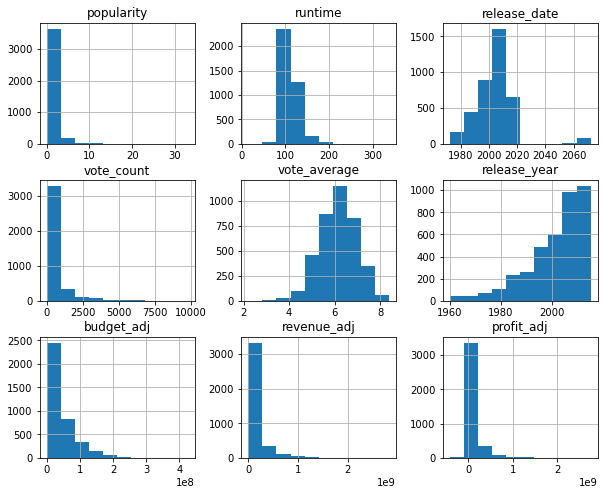

In [114]:
df.hist(figsize=(10,8));

When taking a look at the histogram for the release date, I am noticing dates past 2015. Lets investigate that and potentially drop those dates if the data looks odd.

In [119]:
#create dataframe where showing release date bigger than 2015
df[df['release_date'] >= '2015-12-31']

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
9719,3.309196,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,Stanley Kubrick,moon|jupiter|artificial intelligence|man vs ma...,149,Science Fiction|Mystery|Adventure,Stanley Kubrick Productions|Metro-Goldwyn-Maye...,2068-04-05,1708,7.7,1968,7.522756e+07,3.555466e+08,280319033
9720,1.152937,Planet of the Apes,Charlton Heston|Roddy McDowall|Kim Hunter|Maur...,Franklin J. Schaffner,human evolution|gorilla|bondage|space marine|c...,112,Adventure|Science Fiction|Mystery,Twentieth Century Fox Film Corporation|APJAC P...,2068-02-07,469,7.2,1968,3.635999e+07,2.093547e+08,172994721
9724,0.786854,Bullitt,Steve McQueen|Jacqueline Bisset|Robert Vaughn|...,Peter Yates,san francisco|hotel|detective|based on novel|a...,113,Action|Crime|Drama|Thriller,Solar Productions|Warner Brothers/Seven Arts,2068-10-17,143,6.7,1968,3.447930e+07,2.651826e+08,230703333
9727,0.724527,Rosemary's Baby,Mia Farrow|John Cassavetes|Ruth Gordon|Sidney ...,Roman Polanski,commercial|anti-christ|contemporary setting|la...,136,Horror|Drama|Mystery,Paramount Pictures|William Castle Productions,2068-06-12,448,7.3,1968,2.006068e+07,2.093547e+08,189294026
9729,0.633129,Oliver!,Ron Moody|Shani Wallis|Oliver Reed|Harry Secom...,Carol Reed,pickpocket|musical|victorian england|orphan boy,153,Drama|Family|Music,Warwick Film Productions|Romulus Films,2068-09-26,42,6.2,1968,6.268964e+07,1.053186e+08,42628952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,alcohol|adultery|professor|married couple|son,131,Drama,Chenault Productions,2066-06-21,74,7.5,1966,5.038511e+07,2.266436e+08,176258462
10828,0.402730,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,cold war|east germany,128,Mystery|Thriller,Universal Pictures,2066-07-13,46,6.3,1966,2.015404e+07,8.733419e+07,67180146
10829,0.395668,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,sheriff|ranch|liquor|settler|revolver,120,Action|Western,Paramount Pictures|Laurel Productions,2066-12-17,36,6.9,1966,3.125892e+07,4.030809e+07,9049165
10835,0.299911,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,missionary|china|us navy|chinese|battle,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08,53744117


In [120]:
#check the summary statistics
df[df['release_date'] >= '2015-12-31'].describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
count,95.000000,95.000000,95.000000,95.000000,95.000000,9.500000e+01,9.500000e+01,9.500000e+01
mean,0.934393,129.126316,232.536842,6.768421,1966.073684,4.073016e+07,2.617502e+08,2.210201e+08
std,0.809829,31.622522,324.109839,0.614239,3.594446,3.921007e+07,3.032400e+08,2.989525e+08
min,0.045242,78.000000,10.000000,5.100000,1960.000000,1.458972e+06,3.796251e+06,-5.883087e+07
25%,0.352773,109.000000,34.500000,6.300000,1963.000000,1.732478e+07,5.737533e+07,2.394840e+07
50%,0.633882,123.000000,116.000000,6.900000,1967.000000,2.614705e+07,1.431869e+08,8.986031e+07
75%,1.160852,143.500000,309.000000,7.200000,1969.500000,4.836889e+07,3.654195e+08,3.046132e+08
max,3.309196,248.000000,1786.000000,8.000000,1971.000000,2.215444e+08,1.574815e+09,1.545635e+09


All dates with release date greate then 2015 seem to be in the 1900s, the release_year is correct but the release_date is converted to 2000s

In [121]:
#offset dates that are bigger than 2015
df.loc[df['release_date'].dt.year >= 2016, 'release_date'] -= pd.DateOffset(years=100)

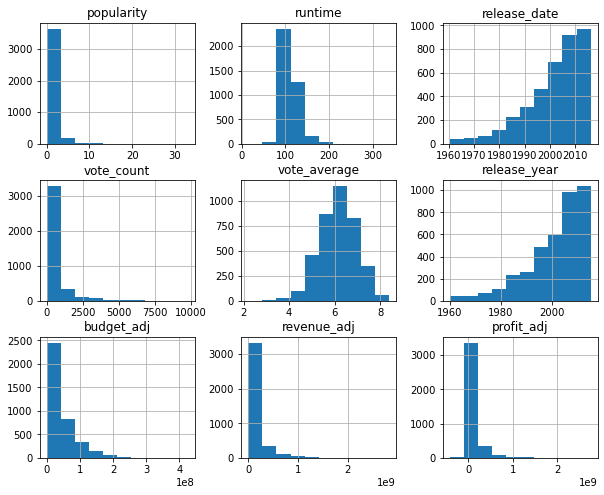

In [122]:
#check if histogram changes
df.hist(figsize=(10,8));

Release date issue has been fixed. Data set is clean and now can continue to the next part of the analysis.

Lastly, let's check the final shape.

In [123]:
print('Shape of Data Frame after cleaning:\n(Rows : Cloumns):', df.shape)

Shape of Data Frame after cleaning:
(Rows : Cloumns): (3854, 15)


<a id='eda'></a>
## Exploratory Data Analysis


### Which were the top 10 movies based on revenue & profit?

To query the data for revenue and profit and then create the same graph for both results, I created a function that would help speed up/more efficient, so you can call up the metric that you want to see the top 10 to products. Therefor if you change the metric you want to view in the function, it will pull the top 10 and then also graph it in a horizontal bar chart. Saving time and coding space. Likewise can be used for the bottom 10 function (bottom_10).

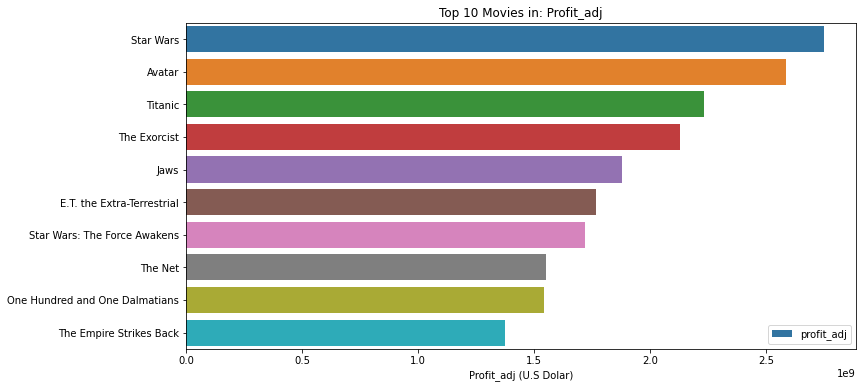

In [129]:

def top_10(Metric,size=10):
    df_top10 = pd.DataFrame(df[Metric].sort_values(ascending=False))[:size]
    df_top10['original_title'] = df['original_title']
    plt.figure(figsize=(12,6))
   
    sns.barplot(x=Metric, y='original_title', data=df_top10, label=Metric)
    if (Metric == 'profit_adj' or Metric == 'budget_adj' or Metric == 'revenue-adj'):
        plt.xlabel(Metric.capitalize() + ' (U.S Dolar)')
    else:
        plt.xlabel(Metric.capitalize())
    plt.ylabel('')
    plt.title('Top 10 Movies in: ' + Metric.capitalize())
    plt.legend()

   
top_10('profit_adj');



Based on Profit, Star Wars, Avatar & Titanic are the highest profit generating movies.

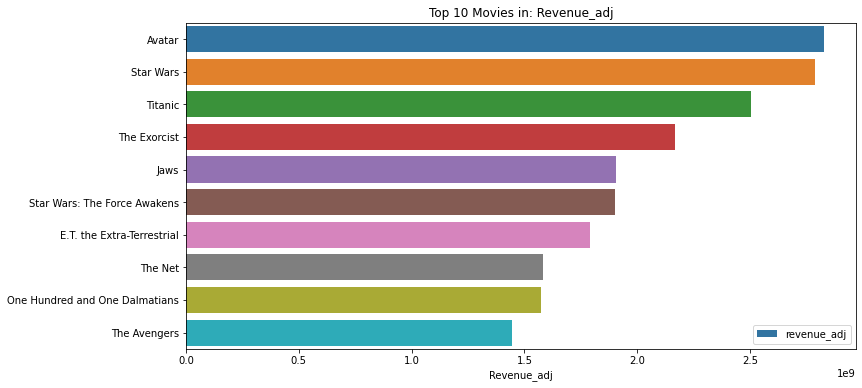

In [130]:
top_10('revenue_adj');

Avatar, Star Wars & Titanic are also the top revenue generating movies, however, Star Wars actually had more profit than Avatar.

The function worked perfectly here by just changing "profit_adj" to "revenue_adj", in stead of having to rewrite the code.

### How has profit changed over the past 56 years?

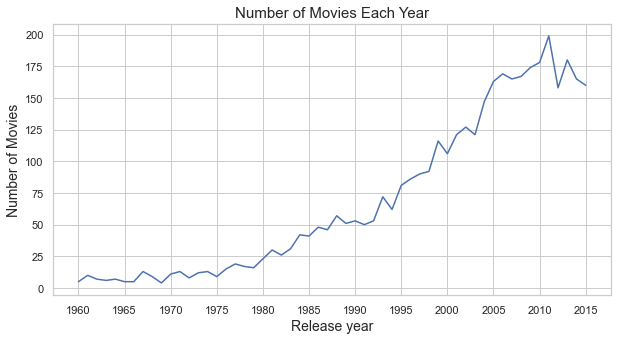

In [135]:
# group each year and count the number of movies in each year 
count_year = df.groupby('release_year').count()['original_title']

#make group of the data according to their release year and count the total number of movies in each year and bucket into 5 years.
df.groupby('release_year').count()['original_title'].plot(xticks = np.arange(1960,2016,5))

#create plot
sns.set(rc={'figure.figsize':(20,5)})
plt.title("Number of Movies Each Year",fontsize = 15)
plt.xlabel('Release year',fontsize = 14)
plt.ylabel('Number of Movies',fontsize = 14)
sns.set_style("whitegrid")

Profit for movies has grown significantly between 1975 & 2015, with 2011 being the top year for profit generated by movies.

### Which were the bottom 10 movies which lost money?

Similar to the Top_10 function that was created, it can be done for the bottom 10, just changing ascending to "True". This helps speed up time and more efficient with the code, if one wanted to see bottom "profit_adj", "revenue_adj" and "budget_adj".

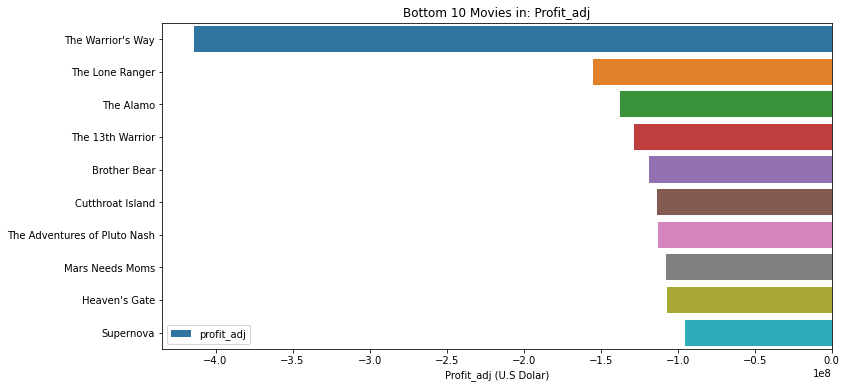

In [133]:
def bottom_10(Metric,size=10):
    df_bot10 = pd.DataFrame(df[Metric].sort_values(ascending=True))[:size]
    df_bot10['original_title'] = df['original_title']
    plt.figure(figsize=(12,6))
   
    sns.barplot(x=Metric, y='original_title', data=df_bot10, label=Metric)
    if (Metric == 'profit_adj' or Metric == 'budget_adj' or Metric == 'revenue-adj'):
        plt.xlabel(Metric.capitalize() + ' (U.S Dolar)')
    else:
        plt.xlabel(Metric.capitalize())
    plt.ylabel('')
    plt.title('Bottom 10 Movies in: ' + Metric.capitalize())
    plt.legend()

   
bottom_10('profit_adj');

There are also movies than lost money, where budget has exceeded the revenue generated. "The Warrior's Way" is the movie which lost the most amount of money.

## Relationships Between Variables:

1. Is there a relationship between vote_average and profit?
2. Is there a relationship between budget & profit?
3. Is there a relationship between runtime & profit?
4. Is there a relationsgip between revenue & profit?

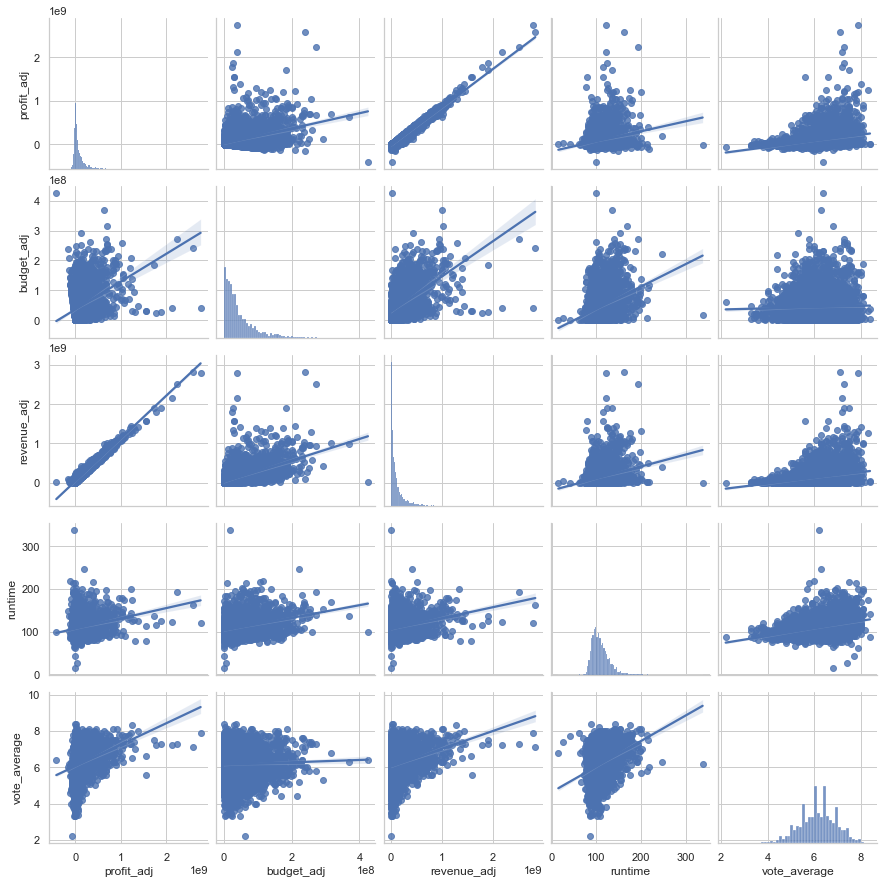

In [138]:
df_relation = df[['profit_adj','budget_adj','revenue_adj','runtime', 'vote_average']]
sns.pairplot(df_relation, kind='reg');

The correlation graphs between the above variable can help assess which varaible potentialy have a relationship with one another. However, this is not a statistical test so none of the below conclusions can be stated, rather relationships between variables described.

### 1. Is there a relationship between vote_average and profit?

Tentatively, there seems to be a slight positive relationship (correlation) between between vote_average & profit, meaning that the higher the profit, the slightly higher the vote average.

### 2. Is there a relationship between budget and profit?
Tentatively, there seems to be a slight positive relationship (correlation) between between budget & profit, meaning that the higher the budget, the slightly higher the profit.

### 3. Is there a relationship between runtime and profit?
Tentatively, there seems to be a slight positive relationship (correlation) between between budget & profit, meaning that the longer the run time, the slightly higher the profit.


### 4. Is there a relationship between revenue and profit?
There is a strong positove relationship (correlation) with revenue & profit, meaning that the higher the revenue of the movie, the higher the profit. Which makes sense.

If you also take a look at budget and profit relationship, you can also see a positive relationship, meaning that potentially the bigger the budget a movie gets, the higher the profit.

<a id='conclusions'></a>
## Conclusions

### Results
> Overall, the top movies based on profit and revenue were:
> 1. Star Wars, Avatar & Titanic. With Stars top for profit while Avatar had the top revenue.
>
> 2. Over the last 56 year, especially since 1975, the profit movies have generated has increased substantially, with the top year being 2011.
>
> 3. The bottom movie, with the highest loss (negative profit) was "The Warrior's Way", with a substantial loss.
> 4. There is also slight positive relationship (correlations) between:
> Vote_average and profit
> Budget and profit
> Runtime and profit
>
> 5. Strong positive relationship between:
> Revenue and profit
>
> However, these are not statistical tests and not conclusions can be made until statistical tests have been run.
>
### Limitations
> 1. Most attributes were categorical data, which limits the number of correlations and statistical tests one can make.
> 2. The analysis conduted was exploratory and used descriptive statistics, no statistical tests were conducted and no inferences (conclusions) can be made from the results.
> 3. There was quite a bit of missing data and data with with zero values which had to be excluded from the analysis.
> 4. The order the actors were listed was acording to the order they appeared on the credits, which could differ in mthodology between films.